In [412]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

In [413]:
import pickle
#load distortion matrix from camera_cal
with open('./camera_cal/wide_dist_pickle.p',mode='rb') as f:
    dist_pickle = pickle.load(f)
    mtx = dist_pickle['mtx']
    dist = dist_pickle["dist"]
print(mtx)
print(dist)
print('loaded mtx matrix and distortion matrix from undistortion')

[[1.15777930e+03 0.00000000e+00 6.67111054e+02]
 [0.00000000e+00 1.15282291e+03 3.86128938e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[-0.24688775 -0.02373132 -0.00109842  0.00035108 -0.00258571]]
loaded mtx matrix and distortion matrix from undistortion


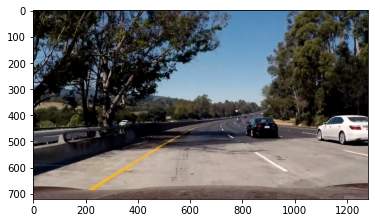

In [414]:
img = mpimg.imread('test_images/test5.jpg')
plt.imshow(img)

In [415]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
abs_sobelx = np.absolute(sobelx)
scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))

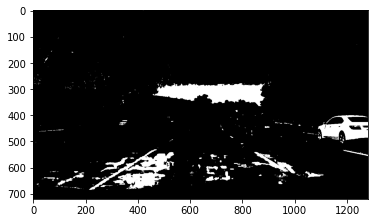

In [416]:
thresh = (180, 255)
binary = np.zeros_like(gray)
binary[(gray > thresh[0]) & (gray <= thresh[1])] = 1
plt.imshow(binary,cmap='Greys_r')

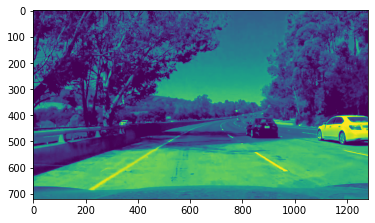

In [417]:
R = img[:,:,0]
G = img[:,:,1]
B = img[:,:,2]
plt.imshow(R)
#R channel will be chosen since it highlights the line most

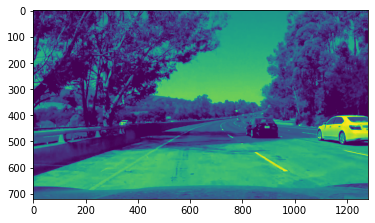

In [283]:
plt.imshow(G)

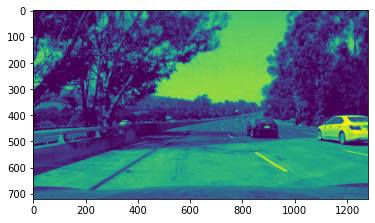

In [284]:
plt.imshow(B)

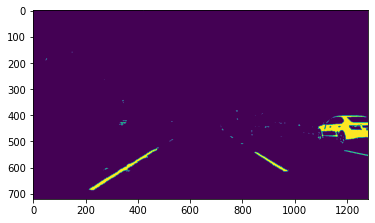

In [285]:
thresh = (210, 255)
binary = np.zeros_like(R)
binary[(R > thresh[0]) & (R <= thresh[1])] = 1
plt.imshow(binary)

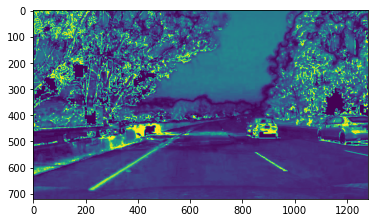

In [286]:
hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
H = hls[:,:,0]
L = hls[:,:,1]
S = hls[:,:,2]
plt.imshow(S)
#S channel will be chosen since it highlights the yellow line the most

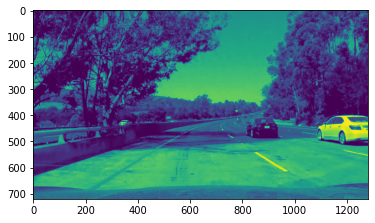

In [287]:
plt.imshow(L)

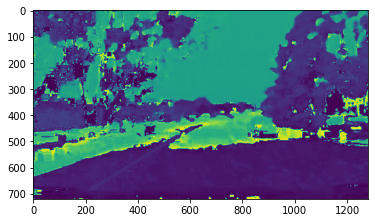

In [288]:
plt.imshow(H)

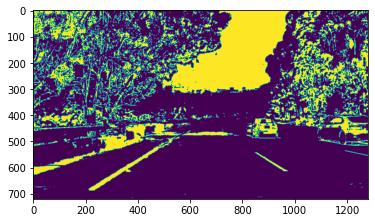

In [289]:
thresh = (90, 255)
binary = np.zeros_like(S)
binary[(S > thresh[0]) & (S <= thresh[1])] = 1
plt.imshow(binary)

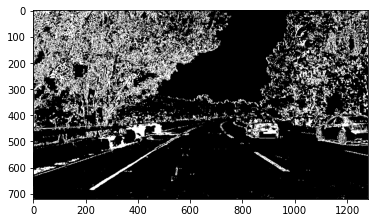

In [312]:
def image_process(image,grad_thresh,s_thresh):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    #process the x direction gradient 
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= grad_thresh[0]) & (scaled_sobel <= grad_thresh[1])] = 1
    
    #process the HIS s channel 
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    s_channel = hls[:,:,2]
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1

#     color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255
# one can show it out to see the colored binary

    # Combine the two binary thresholds
    combined_binary = np.zeros_like(sxbinary)
    combined_binary[(s_binary == 1) | (sxbinary == 1)] = 1
    return combined_binary


img = mpimg.imread('test_images/test5.jpg')
grad_thresh=[20,100]
s_thresh=[170,255]
img=image_process(img,grad_thresh,s_thresh)
plt.imshow(img, cmap='gray')

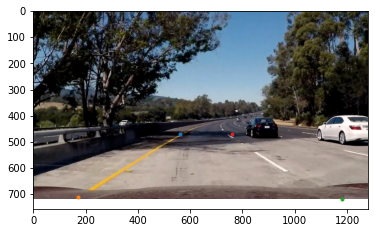

In [313]:
# the choosen source point was selected as below
image = mpimg.imread('test_images/test5.jpg')

plt.imshow(image)
plt.plot(560,470,'.')
plt.plot(170,710,'.')
plt.plot(1180,720,'.')
plt.plot(760,470,'.')

In [439]:
left_top=[560,470]
left_bottom =[170,710]
right_top =[1180,720]
right_bottom =[760,470]

# I will decide a place to place the birdviewed image

def warp(img,tobird=True):
    corners = np.float32([left_top,left_bottom, right_top,right_bottom])
    offset = 150  #test the image to extimate a offset
    img_size = (img.shape[1], img.shape[0])
    src = np.float32(
        [corners[0],
         corners[1],
         corners[2],
         corners[3]])
  #decide a place to place the birdviewed image, get these points by testing an image
    dst = np.float32([
        [offset, 0], 
        [offset, img_size[1]],                         
        [img_size[0] - offset, img_size[1]],            
        [img_size[0] - offset,0]])  

    if tobird:
        M = cv2.getPerspectiveTransform(src, dst)
    else:
        M = cv2.getPerspectiveTransform(dst,src)
    warped = cv2.warpPerspective(img, M, img_size , flags=cv2.INTER_LINEAR)    
    return warped,M,src,dst

Text(0.5, 1.0, 'Warped')

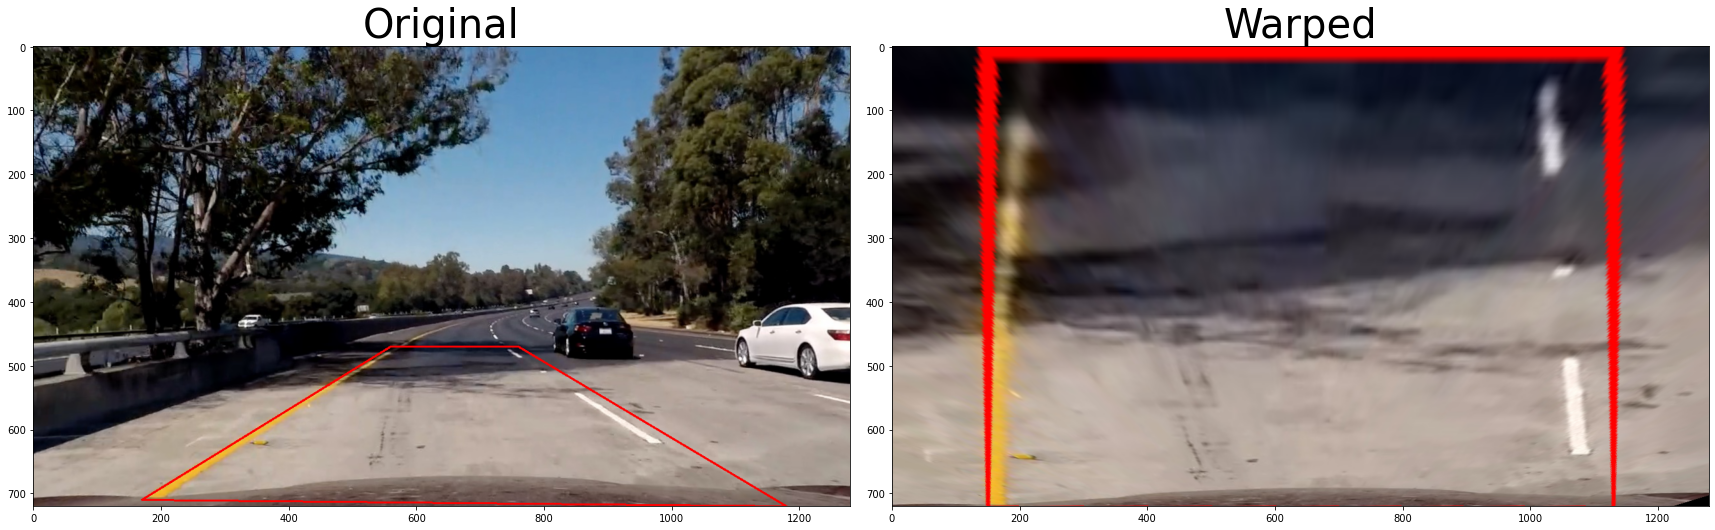

In [311]:
img=plt.imread('test_images/test5.jpg')
img = cv2.undistort(img, mtx, dist, None, mtx)
imshape = img.shape

corner_tuples=[]
for ind,c in enumerate(corners):
    corner_tuples.append(tuple(corners[ind]))

cv2.line(img, corner_tuples[0], corner_tuples[1], color=[255,0,0], thickness=2)
cv2.line(img, corner_tuples[1], corner_tuples[2], color=[255,0,0], thickness=2)
cv2.line(img, corner_tuples[2], corner_tuples[3], color=[255,0,0], thickness=2)
cv2.line(img, corner_tuples[3], corner_tuples[0], color=[255,0,0], thickness=2)

warped,M,src,dst= warp(img) 

# Plot the result
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(img)
ax1.set_title('Original', fontsize=40)

ax2.imshow(warped)
ax2.set_title('Warped', fontsize=40)

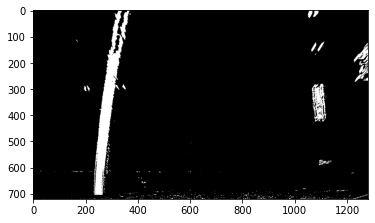

In [373]:
image=plt.imread('test_images/test6.jpg')
img,M,src,dit=warp(image)

grad_thresh=[20,100]
s_thresh=[170,255]
img=image_process(img,grad_thresh,s_thresh)
plt.imshow(img, cmap='gray')

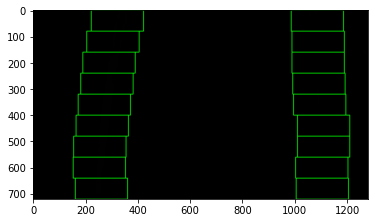

In [372]:

# Load  above image
binary_warped = img

def find_lane_pixels(binary_warped):
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    # Create an output image to draw on and visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]//2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # HYPERPARAMETERS
    # Choose the number of sliding windows
    nwindows = 9
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50

    # Set height of windows - based on nwindows above and image shape
    window_height = np.int(binary_warped.shape[0]//nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated later for each window in nwindows
    leftx_current = leftx_base
    rightx_current = rightx_base

    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),
        (win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),
        (win_xright_high,win_y_high),(0,255,0), 2) 
        
        # Identify the nonzero pixels in x and y within the window #
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices (previously was a list of lists of pixels)
    try:
        left_lane_inds = np.concatenate(left_lane_inds)
        right_lane_inds = np.concatenate(right_lane_inds)
    except ValueError:
        # Avoids an error if the above is not implemented fully
        pass

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    return leftx, lefty, rightx, righty, out_img
leftx, lefty, rightx, righty, out_img=find_lane_pixels(binary_warped)
plt.imshow(out_img)  

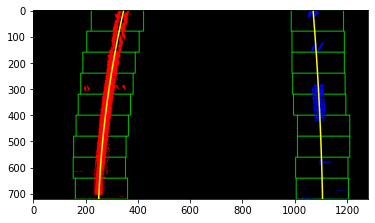

In [375]:
def fit_polynomial(binary_warped):
    # Find our lane pixels first
    leftx, lefty, rightx, righty, out_img = find_lane_pixels(binary_warped)
    # Fit a second order polynomial to each using `np.polyfit`
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    try:
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    except TypeError:
        # Avoids an error if `left` and `right_fit` are still none or incorrect
        print('The function failed to fit a line!')
        left_fitx = 1*ploty**2 + 1*ploty
        right_fitx = 1*ploty**2 + 1*ploty

    ## Visualization ##
    # Colors in the left and right lane regions
    out_img[lefty, leftx] = [255, 0, 0]
    out_img[righty, rightx] = [0, 0, 255]

    # Plots the left and right polynomials on the lane lines
    plt.plot(left_fitx, ploty, color='yellow')
    plt.plot(right_fitx, ploty, color='yellow')

    return left_fitx,right_fitx,out_img

left_fitx,right_fitx,out_img = fit_polynomial(binary_warped)

plt.imshow(out_img)
# print(left_fitx)